## IMPORT LIBRARY

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## MEMBUAT GAMBAR

In [17]:
img = cv2.imread('kertas1.jpg') 
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

## MENGATUR WARNA RANGE DARI GAMBAR

In [9]:
color_ranges = {
    'blue': {
        'lower': np.array([100, 50, 50]),
        'upper': np.array([140, 255, 255])
    },
    'red': {
        'lower1': np.array([0, 70, 50]),
        'upper1': np.array([10, 255, 255]),
        'lower2': np.array([170, 70, 50]),
        'upper2': np.array([180, 255, 255])
    },
    'green': {
        'lower': np.array([40, 50, 50]),
        'upper': np.array([80, 255, 255])
    }
}

## MELAKUKAN PEMISAHAN DENGAN MENGGUNAKAN MASK

In [12]:
mask_none = np.zeros(hsv.shape[:2], dtype=np.uint8)

mask_blue = cv2.inRange(hsv, color_ranges['blue']['lower'], color_ranges['blue']['upper'])

mask_red1 = cv2.inRange(hsv, color_ranges['red']['lower1'], color_ranges['red']['upper1'])
mask_red2 = cv2.inRange(hsv, color_ranges['red']['lower2'], color_ranges['red']['upper2'])
mask_red = cv2.bitwise_or(mask_red1, mask_red2)

mask_green = cv2.inRange(hsv, color_ranges['green']['lower'], color_ranges['green']['upper'])

mask_red_blue = cv2.bitwise_or(mask_red, mask_blue)
mask_rgb = cv2.bitwise_or(mask_red_blue, mask_green)

## MENAMPILKAN GAMBAR

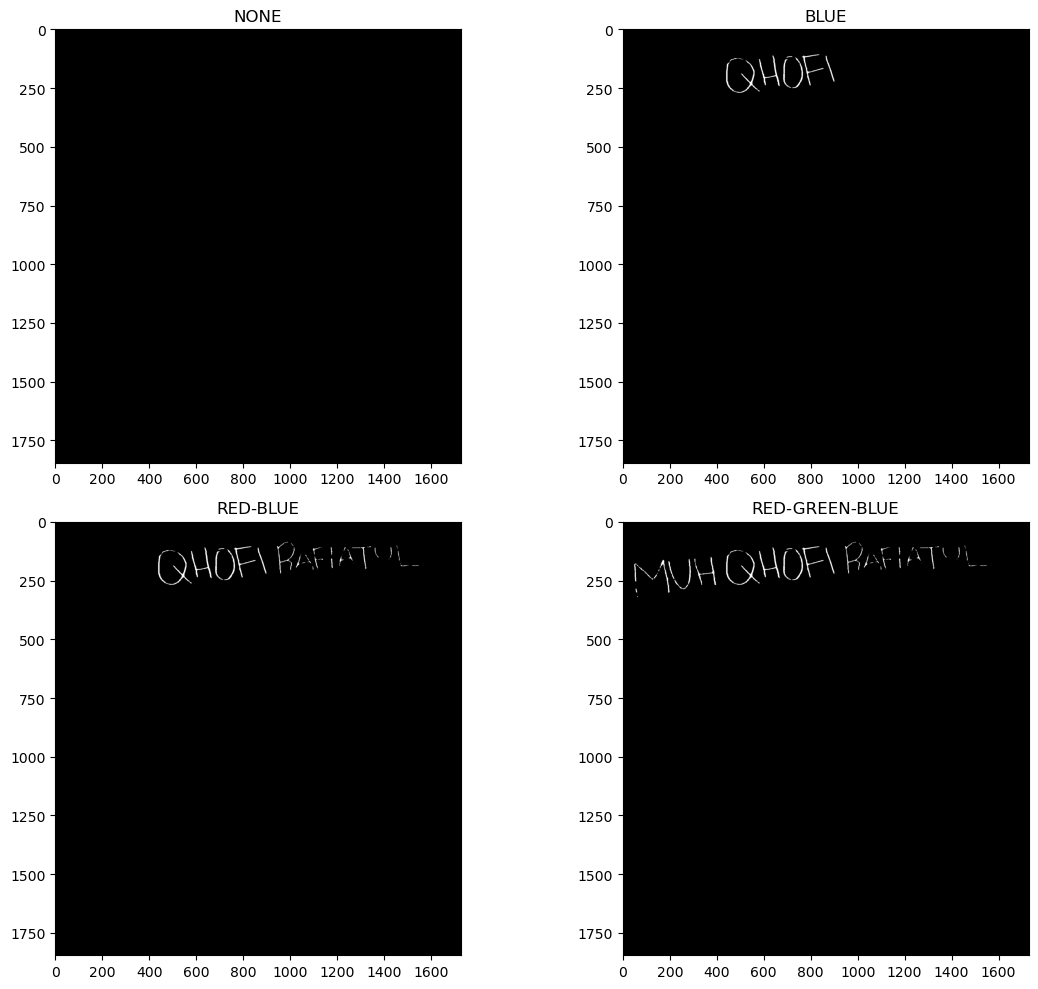

In [15]:
titles = ['NONE', 'BLUE', 'RED-BLUE', 'RED-GREEN-BLUE']
masks = [mask_none, mask_blue, mask_red_blue, mask_rgb]

plt.figure(figsize=(12, 10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(masks[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('on')

plt.tight_layout()
plt.show()